In [1]:
%load_ext autoreload
%autoreload 2
import math
import numpy as np


from sklearn.cross_validation import train_test_split

from matplotlib import pyplot as plt
%matplotlib inline

SEED = 199 

/extdrive1/anaconda3/envs/amlenv/lib/python3.6/site-packages/sklearn/cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [2]:
X = np.load('X.npy')
y = np.load('y.npy')
print(X[0:1,:])

print(X.shape, y.shape,sep='\n')
X_train, X_test, y_train, y_test = train_test_split(
     X, y, test_size=.33, random_state=SEED)



print(X_train.shape, X_test.shape,sep='\n')

[[-1.69864255  0.60587297  1.08623665 -1.35907589  0.09175171 -1.72917063
   0.32811388 -1.33958995  1.5332894   1.61508971  0.84722853 -1.62794317
  -1.52995417  1.12233683  1.2499034  -0.25931899  0.         -0.98360875
  -0.14856415  0.14856415  1.5279518  -0.99834025 -0.42239949 -0.22830453
  -1.02373279  1.02373279 -0.49957247  0.49957247 -0.97949492  0.97949492
   0.         -0.65835683 -0.81664618  1.53652841 -0.1517957  -0.12879773
  -0.12938451 -0.14993255 -0.14976212 -0.14856415 -0.13189904 -0.14526706
  -0.1514585  -0.12977432 -0.15463491 -0.14438795 -0.14314887 -0.13698402
  -0.14526706 -0.14027892 -0.14993255 -0.14118155 -0.14082114 -0.15313776
  -0.13399234 -0.13900615 -0.15010279 -0.13698402 -0.14082114 -0.14856415
  -0.1338033  -0.14596685 -0.1358693  -0.15078204 -0.13698402 -0.13937089
  -0.14064061 -0.15297059 -0.14735729 -0.13605567 -0.14009775 -0.14959152
  -0.13679882 -0.14189985 -0.14596685 -0.13304464 -0.14770303 -0.14561734
  -0.14243638 -0.13624181  6.71558628 

In [3]:
import torch
from torch.utils.data import TensorDataset,DataLoader

X_train,y_train = torch.FloatTensor(X_train), torch.FloatTensor(y_train)
print(X_train.shape)
batch_size = 512
dataset = TensorDataset(X_train,y_train)
dataloader = DataLoader(dataset, 
                              batch_size = batch_size,
                              shuffle = True)

torch.Size([13713, 88])


In [4]:
hyper_params = {'nn_lr':1e-2,
               'lh_lr':1e-3,
               'batch_size':1024,
               'epochs':100,
               'grid_size':64,
               'grid_bounds':(-1,1),
               'latent_dim':2,
               'input_dim':X_train.size(1),
               'num_mixtures':4
              }

In [5]:

from trainer import SvDklTrainer
trainer = SvDklTrainer(hyper_params, aml_run=None)

999
{'nn_lr': 0.01, 'lh_lr': 0.001, 'batch_size': 1024, 'epochs': 100, 'grid_size': 64, 'grid_bounds': (-1, 1), 'latent_dim': 2, 'input_dim': 88, 'num_mixtures': 4}


In [6]:
trainer.fit(dataloader)

Train Epoch: 1 [002/027], Loss: 0.834310
Train Epoch: 1 [004/027], Loss: 0.785887
Train Epoch: 1 [006/027], Loss: 0.834269
Train Epoch: 1 [008/027], Loss: 0.776174
Train Epoch: 1 [010/027], Loss: 0.826071
Train Epoch: 1 [012/027], Loss: 0.856823
Train Epoch: 1 [014/027], Loss: 0.811506
Train Epoch: 1 [016/027], Loss: 0.795897
Train Epoch: 1 [018/027], Loss: 0.826306
Train Epoch: 1 [020/027], Loss: 0.843640
Train Epoch: 1 [022/027], Loss: 0.810999
Train Epoch: 1 [024/027], Loss: 0.785681
Train Epoch: 1 [026/027], Loss: 0.818965
Train Epoch: 2 [002/027], Loss: 0.784435
Train Epoch: 2 [004/027], Loss: 0.820190
Train Epoch: 2 [006/027], Loss: 0.833081
Train Epoch: 2 [008/027], Loss: 0.812980
Train Epoch: 2 [010/027], Loss: 0.814532
Train Epoch: 2 [012/027], Loss: 0.789288
Train Epoch: 2 [014/027], Loss: 0.823490
Train Epoch: 2 [016/027], Loss: 0.870302
Train Epoch: 2 [018/027], Loss: 0.830079
Train Epoch: 2 [020/027], Loss: 0.798621
Train Epoch: 2 [022/027], Loss: 0.806757
Train Epoch: 2 [

Train Epoch: 16 [010/027], Loss: 0.725159
Train Epoch: 16 [012/027], Loss: 0.722996
Train Epoch: 16 [014/027], Loss: 0.711511
Train Epoch: 16 [016/027], Loss: 0.712018
Train Epoch: 16 [018/027], Loss: 0.720741
Train Epoch: 16 [020/027], Loss: 0.709539
Train Epoch: 16 [022/027], Loss: 0.719532
Train Epoch: 16 [024/027], Loss: 0.725175
Train Epoch: 16 [026/027], Loss: 0.730467
Train Epoch: 17 [002/027], Loss: 0.709272
Train Epoch: 17 [004/027], Loss: 0.730999
Train Epoch: 17 [006/027], Loss: 0.716975
Train Epoch: 17 [008/027], Loss: 0.707642
Train Epoch: 17 [010/027], Loss: 0.765721
Train Epoch: 17 [012/027], Loss: 0.713549
Train Epoch: 17 [014/027], Loss: 0.718043
Train Epoch: 17 [016/027], Loss: 0.707577
Train Epoch: 17 [018/027], Loss: 0.735463
Train Epoch: 17 [020/027], Loss: 0.702964
Train Epoch: 17 [022/027], Loss: 0.703486
Train Epoch: 17 [024/027], Loss: 0.708759
Train Epoch: 17 [026/027], Loss: 0.703087
Train Epoch: 18 [002/027], Loss: 0.709483
Train Epoch: 18 [004/027], Loss: 0

Train Epoch: 31 [014/027], Loss: 0.671104
Train Epoch: 31 [016/027], Loss: 0.665000
Train Epoch: 31 [018/027], Loss: 0.672514
Train Epoch: 31 [020/027], Loss: 0.668807
Train Epoch: 31 [022/027], Loss: 0.681458
Train Epoch: 31 [024/027], Loss: 0.683704
Train Epoch: 31 [026/027], Loss: 0.673486
Train Epoch: 32 [002/027], Loss: 0.670257
Train Epoch: 32 [004/027], Loss: 0.665042
Train Epoch: 32 [006/027], Loss: 0.674571
Train Epoch: 32 [008/027], Loss: 0.679491
Train Epoch: 32 [010/027], Loss: 0.665651
Train Epoch: 32 [012/027], Loss: 0.669578
Train Epoch: 32 [014/027], Loss: 0.672896
Train Epoch: 32 [016/027], Loss: 0.669137
Train Epoch: 32 [018/027], Loss: 0.676576
Train Epoch: 32 [020/027], Loss: 0.673533
Train Epoch: 32 [022/027], Loss: 0.672087
Train Epoch: 32 [024/027], Loss: 0.666530
Train Epoch: 32 [026/027], Loss: 0.669767
Train Epoch: 33 [002/027], Loss: 0.679305
Train Epoch: 33 [004/027], Loss: 0.665434
Train Epoch: 33 [006/027], Loss: 0.678378
Train Epoch: 33 [008/027], Loss: 0

Train Epoch: 46 [020/027], Loss: 0.659871
Train Epoch: 46 [022/027], Loss: 0.653581
Train Epoch: 46 [024/027], Loss: 0.643858
Train Epoch: 46 [026/027], Loss: 0.654985
Train Epoch: 47 [002/027], Loss: 0.660136
Train Epoch: 47 [004/027], Loss: 0.656751
Train Epoch: 47 [006/027], Loss: 0.640330
Train Epoch: 47 [008/027], Loss: 0.649694
Train Epoch: 47 [010/027], Loss: 0.650954
Train Epoch: 47 [012/027], Loss: 0.660453
Train Epoch: 47 [014/027], Loss: 0.650705
Train Epoch: 47 [016/027], Loss: 0.633317
Train Epoch: 47 [018/027], Loss: 0.668475
Train Epoch: 47 [020/027], Loss: 0.649769
Train Epoch: 47 [022/027], Loss: 0.655783
Train Epoch: 47 [024/027], Loss: 0.663486
Train Epoch: 47 [026/027], Loss: 0.641228
Train Epoch: 48 [002/027], Loss: 0.641729
Train Epoch: 48 [004/027], Loss: 0.659379
Train Epoch: 48 [006/027], Loss: 0.647614
Train Epoch: 48 [008/027], Loss: 0.646560
Train Epoch: 48 [010/027], Loss: 0.646394
Train Epoch: 48 [012/027], Loss: 0.659078
Train Epoch: 48 [014/027], Loss: 0

Train Epoch: 61 [026/027], Loss: 0.648604
Train Epoch: 62 [002/027], Loss: 0.650374
Train Epoch: 62 [004/027], Loss: 0.644846
Train Epoch: 62 [006/027], Loss: 0.646954
Train Epoch: 62 [008/027], Loss: 0.647229
Train Epoch: 62 [010/027], Loss: 0.652276
Train Epoch: 62 [012/027], Loss: 0.635392
Train Epoch: 62 [014/027], Loss: 0.649534
Train Epoch: 62 [016/027], Loss: 0.624678
Train Epoch: 62 [018/027], Loss: 0.649989
Train Epoch: 62 [020/027], Loss: 0.641158
Train Epoch: 62 [022/027], Loss: 0.632937
Train Epoch: 62 [024/027], Loss: 0.639763
Train Epoch: 62 [026/027], Loss: 0.639071
Train Epoch: 63 [002/027], Loss: 0.646186
Train Epoch: 63 [004/027], Loss: 0.631354
Train Epoch: 63 [006/027], Loss: 0.631647
Train Epoch: 63 [008/027], Loss: 0.640175
Train Epoch: 63 [010/027], Loss: 0.654483
Train Epoch: 63 [012/027], Loss: 0.643237
Train Epoch: 63 [014/027], Loss: 0.645863
Train Epoch: 63 [016/027], Loss: 0.641694
Train Epoch: 63 [018/027], Loss: 0.649331
Train Epoch: 63 [020/027], Loss: 0

Train Epoch: 77 [002/027], Loss: 0.644890
Train Epoch: 77 [004/027], Loss: 0.632405
Train Epoch: 77 [006/027], Loss: 0.650054
Train Epoch: 77 [008/027], Loss: 0.641529
Train Epoch: 77 [010/027], Loss: 0.636625
Train Epoch: 77 [012/027], Loss: 0.644008
Train Epoch: 77 [014/027], Loss: 0.631955
Train Epoch: 77 [016/027], Loss: 0.639724
Train Epoch: 77 [018/027], Loss: 0.649914
Train Epoch: 77 [020/027], Loss: 0.645597
Train Epoch: 77 [022/027], Loss: 0.651081
Train Epoch: 77 [024/027], Loss: 0.637848
Train Epoch: 77 [026/027], Loss: 0.641049
Train Epoch: 78 [002/027], Loss: 0.644282
Train Epoch: 78 [004/027], Loss: 0.635793
Train Epoch: 78 [006/027], Loss: 0.627586
Train Epoch: 78 [008/027], Loss: 0.644187
Train Epoch: 78 [010/027], Loss: 0.641842
Train Epoch: 78 [012/027], Loss: 0.640036
Train Epoch: 78 [014/027], Loss: 0.634766
Train Epoch: 78 [016/027], Loss: 0.638232
Train Epoch: 78 [018/027], Loss: 0.636457
Train Epoch: 78 [020/027], Loss: 0.646230
Train Epoch: 78 [022/027], Loss: 0

Train Epoch: 92 [004/027], Loss: 0.640232
Train Epoch: 92 [006/027], Loss: 0.637473
Train Epoch: 92 [008/027], Loss: 0.627480
Train Epoch: 92 [010/027], Loss: 0.638964
Train Epoch: 92 [012/027], Loss: 0.634375
Train Epoch: 92 [014/027], Loss: 0.639766
Train Epoch: 92 [016/027], Loss: 0.639874
Train Epoch: 92 [018/027], Loss: 0.643250
Train Epoch: 92 [020/027], Loss: 0.621811
Train Epoch: 92 [022/027], Loss: 0.651253
Train Epoch: 92 [024/027], Loss: 0.630713
Train Epoch: 92 [026/027], Loss: 0.637717
Train Epoch: 93 [002/027], Loss: 0.631923
Train Epoch: 93 [004/027], Loss: 0.631982
Train Epoch: 93 [006/027], Loss: 0.632821
Train Epoch: 93 [008/027], Loss: 0.635054
Train Epoch: 93 [010/027], Loss: 0.640029
Train Epoch: 93 [012/027], Loss: 0.640283
Train Epoch: 93 [014/027], Loss: 0.649390
Train Epoch: 93 [016/027], Loss: 0.629728
Train Epoch: 93 [018/027], Loss: 0.646465
Train Epoch: 93 [020/027], Loss: 0.628983
Train Epoch: 93 [022/027], Loss: 0.636158
Train Epoch: 93 [024/027], Loss: 0

In [14]:
X_test,y_test = torch.FloatTensor(X_test).to(trainer.device), torch.FloatTensor(y_test).to(trainer.device)
print(X_test.shape)
batch_size = 512
dataset = TensorDataset(X_test,y_test)
test_dataloader = DataLoader(dataset, 
                              batch_size = batch_size,
                              shuffle = True)

torch.Size([6755, 88])


In [8]:
trainer.eval(test_dataloader)

AUC score:  0.51
Accuracy score:  0.11


/extdrive1/anaconda3/envs/amlenv/lib/python3.6/site-packages/torch/nn/functional.py:2016: UserWarning: Using a target size (torch.Size([512])) that is different to the input size (torch.Size([512, 1])) is deprecated. Please ensure they have the same size.
  "Please ensure they have the same size.".format(target.size(), input.size()))
/extdrive1/anaconda3/envs/amlenv/lib/python3.6/site-packages/torch/nn/functional.py:2016: UserWarning: Using a target size (torch.Size([401])) that is different to the input size (torch.Size([401, 1])) is deprecated. Please ensure they have the same size.
  "Please ensure they have the same size.".format(target.size(), input.size()))


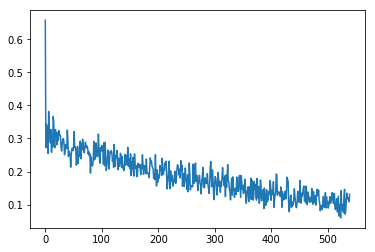

In [218]:
import matplotlib.pyplot as plt
%matplotlib inline

e_losses = []
num_epochs = 20
for e in range(num_epochs):
    e_losses += train_epoch(net, opt, criterion,dataloader)
plt.plot(e_losses)

In [35]:
import seaborn as sns



y_pred_lst = []
y_truth_lst = []
mean_lst=[]
with torch.no_grad():
    for i, (X, y) in enumerate(test_dataloader):
        
        output = trainer.likelihood(trainer.model(X.to(trainer.device)))
        
        mean_lst.append(output.mean.float().cpu().numpy())
        y_pred = output.mean.ge(0.5).float().cpu().numpy()
        
        y_pred_lst.append(y_pred)
        y_truth_lst.append(y.cpu().numpy())
        
    truth = np.concatenate(y_truth_lst)
    pred =  np.concatenate(y_pred_lst)
    mean = np.concatenate(mean_lst)
    #auc = roc_auc_score(truth,pred)
    #accuracy = accuracy_score(truth,pred)   
    
#print("AUC score: ",round(auc,2))
#print("Accuracy score: ",round(accuracy,2))

In [51]:
mean.reshape(1,-1).shape

(1, 6755)

In [54]:
 np.meshgrid(mean).shape#grid.shape

AttributeError: 'list' object has no attribute 'shape'

In [ ]:
cmap = sns.diverging_palette(250, 12, s=85, l=25, as_cmap=True)
fig, ax = plt.subplots(figsize=(16, 9))
contour = ax.tricontour(grid[0].ravel(),grid[1].ravel(), mean, cmap=cmap)
#ax.scatter(X_test[pred==0, 0], X_test[pred==0, 1])
#ax.scatter(X_test[pred==1, 0], X_test[pred==1, 1], color='r')
cbar = plt.colorbar(contour, ax=ax)
_ = ax.set(xlim=(-3, 3), ylim=(-3, 3), xlabel='X', ylabel='Y');
cbar.ax.set_ylabel('Posterior predictive mean probability of class label = 0')

In [ ]:
cmap = sns.cubehelix_palette(light=1, as_cmap=True)
fig, ax = plt.subplots(figsize=(16, 9))
contour = ax.contourf(grid[0], grid[1], ppc.std(axis=0).reshape(100, 100), cmap=cmap)
ax.scatter(X_test[pred==0, 0], X_test[pred==0, 1])
ax.scatter(X_test[pred==1, 0], X_test[pred==1, 1], color='r')
cbar = plt.colorbar(contour, ax=ax)
_ = ax.set(xlim=(-3, 3), ylim=(-3, 3), xlabel='X', ylabel='Y');
cbar.ax.set_ylabel('Uncertainty (posterior predictive standard deviation)');